In [1]:
%reload_ext Cython
import scipy as sp
import numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from scipy import special
import cython
from spline_wrapper import calculate_spline, evaluate_spline
import math

In [2]:
def f(x):
    return pow(x, (1 + special.j0(x))) / np.sqrt((1 + (100 * x * x)) * (1 - x))

## Question 2

### (a) Convert the function to a table, spaced 0.05 apart, sampling it from 0.1 to 0.9.

In [3]:
x = np.arange(0.1, 0.95, 0.05)
y = f(x)

### (b) In python, plot this function and determine its general behaviour. Is it analytic in that region? What is the radius of convergence at x = 0 and at x = 0.9?

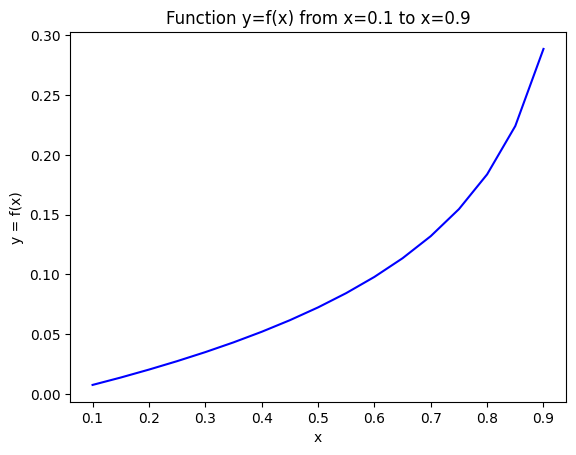

In [4]:
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Function y=f(x) from x=0.1 to x=0.9")
plt.plot(x, y, 'b')
plt.show()

### (c) Use spline interpolation on the function in Eq. (1). Use y′′ = 0 at the boundaries, and obtain the spline coefficients and hence interpolate as above. How does the error vary with the number of uniformly spaced spline points? How many points are required to achieve six digit accuracy?

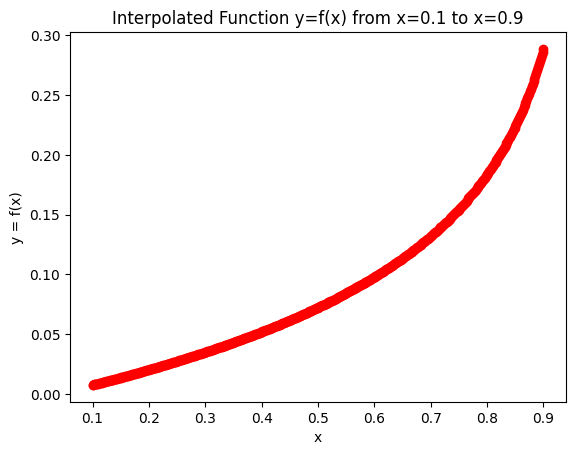

In [7]:
n=85
xa=np.linspace(0.1,0.90, n)
ya=f(xa)
y2a=np.zeros(xa.shape)
xx=np.linspace(0.1,0.9,500)
yt=f(xx)
yy=np.zeros(xx.shape)
u=np.zeros(xa.shape)


y2a = calculate_spline(xa, ya, 1.e30, 1.e30)

for i in range(len(xx)):
    yy[i] = evaluate_spline(xa, ya, y2a, xx[i])

plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Interpolated Function y=f(x) from x=0.1 to x=0.9")
plt.plot(xx, yy, 'ro')

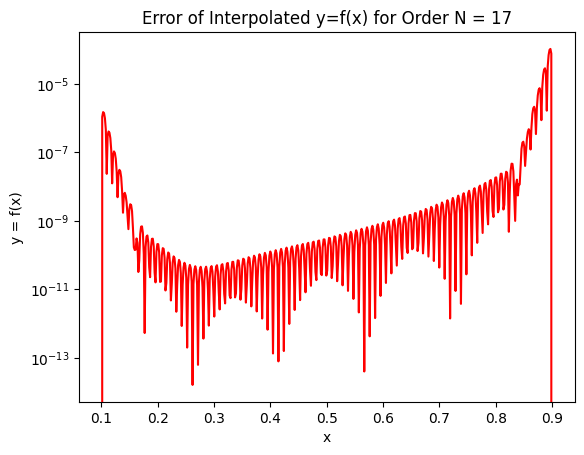

In [8]:
errs = abs(yy-yt)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Error of Interpolated y=f(x) for Order N = 17")
plt.semilogy(xx, errs, 'r')

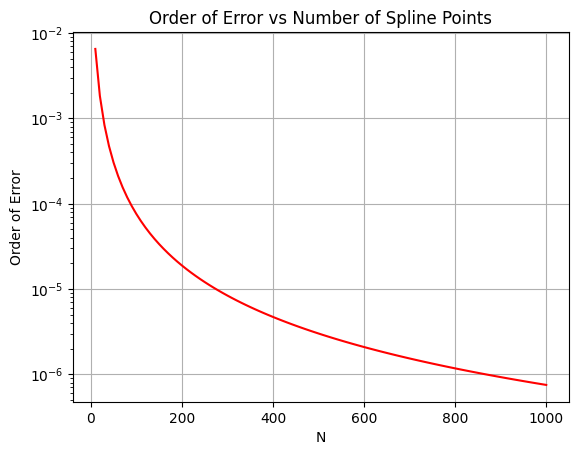

In [7]:
num_samples = [i for i in range(10, 1001, 10)]
max_err = []

for num in num_samples:
    xa=np.linspace(0.1,0.90, num)
    ya=f(xa)
    y2a=np.zeros(xa.shape)
    xx=np.linspace(0.1,0.9,3*num)
    yt=f(xx)
    yy=np.zeros(xx.shape)
    u=np.zeros(xa.shape)
    
    
    y2a = calculate_spline(xa, ya, 1.e30, 1.e30)
    
    for i in range(len(xx)):
        yy[i] = evaluate_spline(xa, ya, y2a, xx[i])

    max_err.append(max(abs(yy-yt)))

plt.xlabel("N")
plt.ylabel("Order of Error")
plt.title("Order of Error vs Number of Spline Points")
plt.semilogy(num_samples, max_err, 'r')
plt.grid()

#### 6-Digit Accuracy
- We see that the max error is less than 10<sup>6</sup> for 870 samples onwards. So we need atleast 870 spline points to achieve 6-digit accuracy in this case.

### (e) Use Eq. 1 to analytically compute the derivitives at the end points. Note that J0′ (x) can be written in terms of J1 (x) and hence computed. Use that information to obtain the spline coefficients. How does the error in the interpolated value compare with Q3 and Q4? This is an important issue for an experimentalist since he usually does not know y′ at x0 and xn , but can use either of Q3 or Q4 to generate his spline fit.

In [9]:
def f_dash(x):
    return (pow(x, (1 + special.j0(x))))*((1+special.j0(x))/x - (special.j1(x))*math.log(x))/(np.sqrt((1 + (100 * x * x)) * (1 - x))) - ((-100*pow(x,2)+200*(1-x)*x-1)*pow(x, (1 + special.j0(x)))/(2*pow((1-x)*(1+100*pow(x,2)),3/2)))

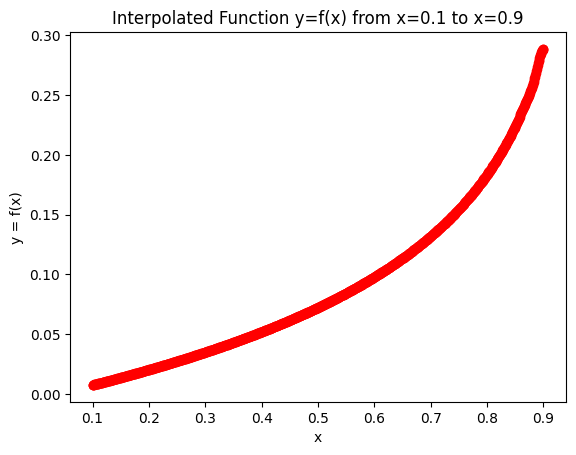

In [14]:
n=17
xa=np.linspace(0.1,0.90, 50)
ya=f(xa)
y2a=np.zeros(xa.shape)
xx=np.linspace(0.1,0.9,1000)
yt=f(xx)
yy=np.zeros(xx.shape)
u=np.zeros(xa.shape)
yp1, ypn = f_dash(xa[0]), f_dash(xa[n-1])

y2a = calculate_spline(xa, ya, yp1, ypn)

for i in range(len(xx)):
    yy[i] = evaluate_spline(xa, ya, y2a, xx[i])

plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Interpolated Function y=f(x) from x=0.1 to x=0.9")
plt.plot(xx, yy, 'ro')

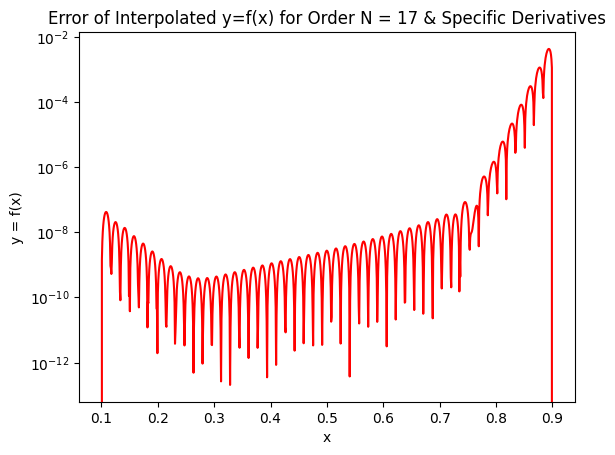

In [15]:
errs = abs(yy-yt)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Error of Interpolated y=f(x) for Order N = 17 & Specific Derivatives")
plt.semilogy(xx, errs, 'r')

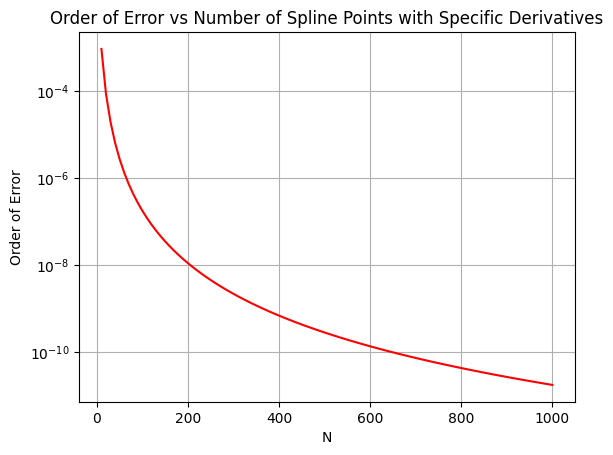

In [14]:
num_samples = [i for i in range(10, 1001, 10)]
max_err = []

for num in num_samples:
    xa=np.linspace(0.1,0.90, num)
    ya=f(xa)
    y2a=np.zeros(xa.shape)
    xx=np.linspace(0.1,0.9,3*num)
    yt=f(xx)
    yy=np.zeros(xx.shape)
    u=np.zeros(xa.shape)
    yp1, ypn = f_dash(xa[0]), f_dash(xa[num-1])
    
    
    y2a = calculate_spline(xa, ya, yp1, ypn)
    
    for i in range(len(xx)):
        yy[i] = evaluate_spline(xa, ya, y2a, xx[i])

    max_err.append(max(abs(yy-yt)))

plt.xlabel("N")
plt.ylabel("Order of Error")
plt.title("Order of Error vs Number of Spline Points with Specific Derivatives")
plt.semilogy(num_samples, max_err, 'r')
plt.grid()

### (f) Use hundred times the actual derivitive as your boundary condition. How does the spline fit change? Plot the points near the edge and show the way that the errors decay. Obtain a functional dependence of error vs distance from edge. This is what you need to explain in the theory assignment.

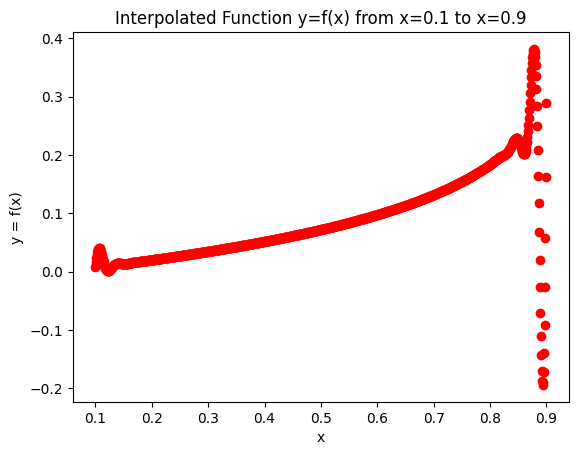

In [12]:
n=50
xa=np.linspace(0.1,0.90, n)
ya=f(xa)
y2a=np.zeros(xa.shape)
xx=np.linspace(0.1,0.9,1000)
yt=f(xx)
yy=np.zeros(xx.shape)
u=np.zeros(xa.shape)
yp1, ypn = f_dash(xa[0]), f_dash(xa[n-1])

y2a = calculate_spline(xa, ya, 100*yp1, 100*ypn)

for i in range(len(xx)):
    yy[i] = evaluate_spline(xa, ya, y2a, xx[i])

plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Interpolated Function y=f(x) from x=0.1 to x=0.9")
plt.plot(xx, yy, 'ro')

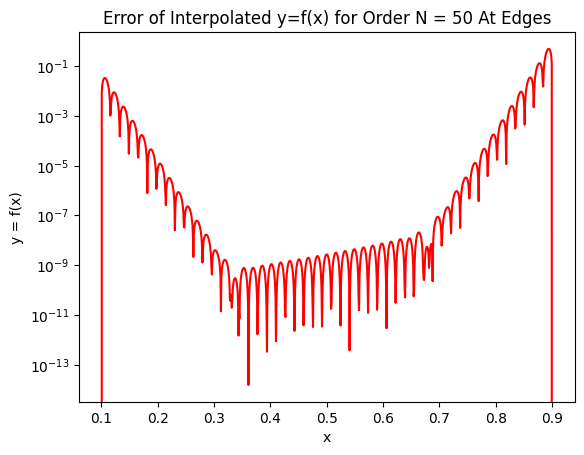

In [13]:
errs = abs(yy-yt)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Error of Interpolated y=f(x) for Order N = 50 At Edges")
plt.semilogy(xx, errs, 'r')